In [7]:
import pandas as pd

In [8]:
veri=pd.read_csv("desktop/alzheimer.csv") 

In [9]:
veri.head() 

,Group,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,Nondemented,M,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,Nondemented,M,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,Demented,M,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,Demented,M,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,Demented,M,80,12,NaN,22.0,0.5,1698,0.701,1.034


In [10]:
#NORMALİZASYON İŞLEMLERİ

In [11]:
veri.shape  #veri setinde 373 satır örneklem, 10 tane öznitelik mevcuttur

(373, 10)

In [12]:
veri.dtypes

Group     object
M/F       object
Age        int64
EDUC       int64
SES      float64
MMSE     float64
CDR      float64
eTIV       int64
nWBV     float64
ASF      float64
dtype: object

In [13]:
import seaborn as sns

<AxesSubplot:xlabel='Group', ylabel='count'>

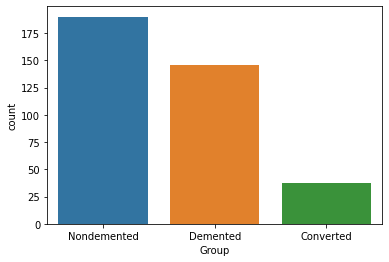

In [14]:
sns.countplot(x="Group",data=veri)

<AxesSubplot:xlabel='Group', ylabel='count'>

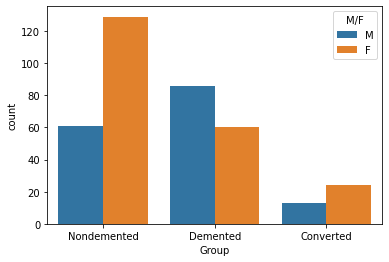

In [15]:
sns.countplot(x="Group", hue="M/F",data=veri)

<AxesSubplot:ylabel='Frequency'>

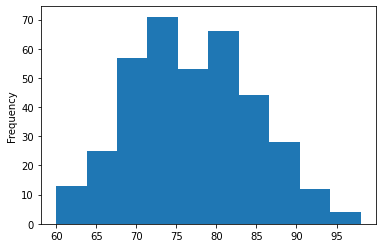

In [16]:
veri["Age"].plot.hist()

In [17]:
veri.isnull().sum()

Group     0
M/F       0
Age       0
EDUC      0
SES      19
MMSE      2
CDR       0
eTIV      0
nWBV      0
ASF       0
dtype: int64

<AxesSubplot:>

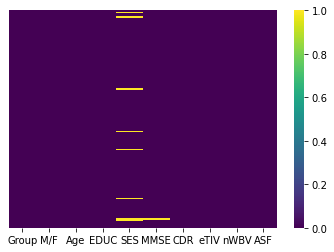

In [18]:
sns.heatmap(veri.isnull(),yticklabels=False,cmap="viridis")  #eksik verilerin görselleştirilmesi

In [19]:
veri.drop(["SES","MMSE"],axis=1,inplace=True)  #eksik veriler veri setinden kaldırılır

In [20]:
veri.head()

,Group,M/F,Age,EDUC,CDR,eTIV,nWBV,ASF
0,Nondemented,M,87,14,0.0,1987,0.696,0.883
1,Nondemented,M,88,14,0.0,2004,0.681,0.876
2,Demented,M,75,12,0.5,1678,0.736,1.046
3,Demented,M,76,12,0.5,1738,0.713,1.010
4,Demented,M,80,12,0.5,1698,0.701,1.034


<AxesSubplot:>

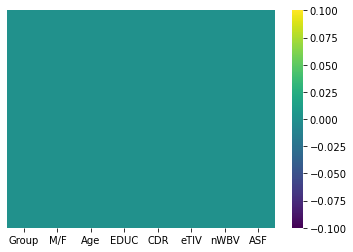

In [21]:
sns.heatmap(veri.isnull(),yticklabels=False,cmap="viridis")

In [22]:
veri.isnull().sum()

Group    0
M/F      0
Age      0
EDUC     0
CDR      0
eTIV     0
nWBV     0
ASF      0
dtype: int64

In [23]:
veri.dropna(inplace=True)

In [24]:
veri.isnull().sum()

Group    0
M/F      0
Age      0
EDUC     0
CDR      0
eTIV     0
nWBV     0
ASF      0
dtype: int64

In [25]:
veri.dtypes

Group     object
M/F       object
Age        int64
EDUC       int64
CDR      float64
eTIV       int64
nWBV     float64
ASF      float64
dtype: object

In [26]:
Group=pd.get_dummies(veri["Group"],drop_first=True)  #uygun tipte olmayan veriler dummy değişkeni ile değiştirilir

In [27]:
Group.head()

,Demented,Nondemented
0,0,1
1,0,1
2,1,0
3,1,0
4,1,0


In [28]:
sex=pd.get_dummies(veri["M/F"],drop_first=True)

In [29]:
sex.head()

,M
0,1
1,1
2,1
3,1
4,1


In [30]:
Group=pd.get_dummies(veri["Group"],drop_first=True)

In [31]:
sex=pd.get_dummies(veri["M/F"],drop_first=True)

In [32]:
veri.drop(["Group","M/F"],axis=1,inplace=True)

In [33]:
veri=pd.concat([veri,Group,sex],axis=1)

In [34]:
veri.dtypes

Age              int64
EDUC             int64
CDR            float64
eTIV             int64
nWBV           float64
ASF            float64
Demented         uint8
Nondemented      uint8
M                uint8
dtype: object

In [35]:
veri   #veri ön işlemeden geçti.Veriseti işlemler için uygun hale getirildi

,Age,EDUC,CDR,eTIV,nWBV,ASF,Demented,Nondemented,M
0,87,14,0.0,1987,0.696,0.883,0,1,1
1,88,14,0.0,2004,0.681,0.876,0,1,1
2,75,12,0.5,1678,0.736,1.046,1,0,1
3,76,12,0.5,1738,0.713,1.010,1,0,1
4,80,12,0.5,1698,0.701,1.034,1,0,1
...,...,...,...,...,...,...,...,...,...
368,82,16,0.5,1693,0.694,1.037,1,0,1
369,86,16,0.5,1688,0.675,1.040,1,0,1
370,61,13,0.0,1319,0.801,1.331,0,1,0
371,63,13,0.0,1327,0.796,1.323,0,1,0


In [36]:
#LOJİSTIK REGRASYON ANALİZİ

In [37]:
x=veri.drop("Demented",axis=1)  #hedef değişken "demented",geri kalan bileşenler özniteliklerdir
y=veri["Demented"]     

#girdi ve çıktı verileri ayarlandı

In [38]:
#Train ve test işlemleri için veri seti parçalara ayıralım

from sklearn.model_selection import train_test_split

In [39]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,
                                               random_state=100)

In [40]:
#tahmin etmesi için kullanıdıgımız hedef için ikili lojistik regresyon analizi kullanılır

from sklearn.linear_model import LogisticRegression

In [41]:
lg_model=LogisticRegression(max_iter=1000)

In [42]:
#eğitim verisi kullnarak modeli eğitelim
lg_model.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

In [43]:
lg_model.score(x_test,y_test)  #buradan anlaşılıyor ki modelimiz yeni veri tahmini %96 başarı ile tahmin edecek

0.9680851063829787

In [44]:
lg_model.score(x_train,y_train) #modelin doğruluk skoru

0.9390681003584229

In [45]:
lg_model=LogisticRegression(C=0.1,max_iter=1000)
lg_model.fit(x_train,y_train)   

LogisticRegression(C=0.1, max_iter=1000)

In [46]:
print(lg_model.score(x_test,y_test))
print(lg_model.score(x_train,y_train))  #modelin eğitim verisi üzerindeki skoru

0.9680851063829787
0.931899641577061


In [47]:
#MODEL DEĞERLENDİRME
#modelin sınıflarının ne kadar doğru tahmin ettiğini bulmak için confusion kullanalım 
#test verisindeki değerleri bulalım

from sklearn.metrics import confusion_matrix

In [48]:
tahmin=lg_model.predict(x_test)

In [49]:
confusion_matrix(y_test,tahmin)

array([[55,  1],
       [ 2, 36]], dtype=int64)

In [50]:
# 55 tane true pozitif, 36 tane true negatif tahmin yapılmış 1 tahmin pozitif iken yanlış tahminde bulunmuş 
#2 pozitif değer de negatif bulunmuş

In [51]:
veri.head()

,Age,EDUC,CDR,eTIV,nWBV,ASF,Demented,Nondemented,M
0,87,14,0.0,1987,0.696,0.883,0,1,1
1,88,14,0.0,2004,0.681,0.876,0,1,1
2,75,12,0.5,1678,0.736,1.046,1,0,1
3,76,12,0.5,1738,0.713,1.010,1,0,1
4,80,12,0.5,1698,0.701,1.034,1,0,1


In [52]:
#eğitilmiş sistemin doğru tahmin yapıp yapmadıgının kontrolü
import numpy as np
yeni_veri=np.array([[80,12,0.5,1698,0.701,1.034,0,1]])

In [53]:
lg_model.predict(yeni_veri)  #sistem 1 değeri verdi bu demek ki bu kişi demented olabilir

array([1], dtype=uint8)

In [54]:
lg_model.coef_ #modeldeki özniteliklerin tahmin edilen katsayıların görüntülenmesi

array([[-1.18534845e-02, -1.42147641e-01,  1.51854240e+00,
         1.47436898e-03,  6.44653900e-03,  1.62621339e-01,
        -1.68342173e+00,  4.10250486e-01]])

In [55]:
#BAYES ALGORİTMASI (NAIVE BAYES CLASSIFICATION)

In [56]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [57]:
%matplotlib inline

In [58]:
from sklearn.datasets import make_blobs
x,y=make_blobs(100,2,centers=2,cluster_std=1.5)  #girdi ve çıktı verileri x ve y değişkenlerine atanır

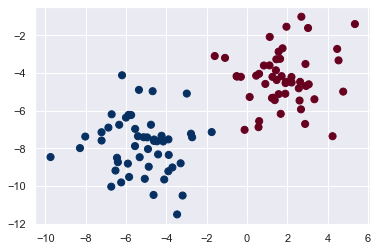

In [59]:
plt.scatter(x[:,0],x[:,1],c=y, s=50, cmap='RdBu')  

In [60]:
from sklearn.naive_bayes import GaussianNB

In [61]:
model=GaussianNB()

In [62]:
model.fit(x,y)  #model fit edildi

GaussianNB()

In [63]:
rng= np.random.RandomState(0)
x_yeni=[3,-3]+[-5,-5]*rng.rand(1000,2)  #rastgele veriler üretelim ve bu verilerin sınıflarını tahmin edelim

In [64]:
y_yeni=model.predict(x_yeni)  #yeni verileri kurdugumuz modele göre tahmin ettik

(-10.49730041706948,
 6.1037978078562025,
 -12.039482991794772,
 -0.4969175816316376)

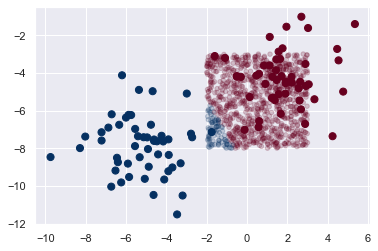

In [65]:
plt.scatter(x[:,0],x[:,1],c=y, s=50, cmap='RdBu')
lim=plt.axis()
plt.scatter(x_yeni[:,0],x_yeni[:,1],c=y_yeni,s=20,cmap='RdBu',alpha=0.2)
plt.axis(lim)

In [66]:
#temel bilgiler

In [67]:
veri.describe()

,Age,EDUC,CDR,eTIV,nWBV,ASF,Demented,Nondemented,M
count,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000
mean,77.013405,14.597855,0.290885,1488.128686,0.729568,1.195461,0.391421,0.509383,0.428954
std,7.640957,2.876339,0.374557,176.139286,0.037135,0.138092,0.488724,0.500583,0.495592
min,60.000000,6.000000,0.000000,1106.000000,0.644000,0.876000,0.000000,0.000000,0.000000
25%,71.000000,12.000000,0.000000,1357.000000,0.700000,1.099000,0.000000,0.000000,0.000000
50%,77.000000,15.000000,0.000000,1470.000000,0.729000,1.194000,0.000000,1.000000,0.000000
75%,82.000000,16.000000,0.500000,1597.000000,0.756000,1.293000,1.000000,1.000000,1.000000
max,98.000000,23.000000,2.000000,2004.000000,0.837000,1.587000,1.000000,1.000000,1.000000


In [68]:
veri.mode()

,Age,EDUC,CDR,eTIV,nWBV,ASF,Demented,Nondemented,M
0,73.0,12.0,0.0,1475,0.696,1.184,0.0,1.0,0.0
1,NaN,NaN,NaN,1483,NaN,1.190,NaN,NaN,NaN


In [69]:
veri.median()

Age              77.000
EDUC             15.000
CDR               0.000
eTIV           1470.000
nWBV              0.729
ASF               1.194
Demented          0.000
Nondemented       1.000
M                 0.000
dtype: float64

In [70]:
veri.mean(axis=0,skipna=True)

Age              77.013405
EDUC             14.597855
CDR               0.290885
eTIV           1488.128686
nWBV              0.729568
ASF               1.195461
Demented          0.391421
Nondemented       0.509383
M                 0.428954
dtype: float64

In [71]:
veri.std()

Age              7.640957
EDUC             2.876339
CDR              0.374557
eTIV           176.139286
nWBV             0.037135
ASF              0.138092
Demented         0.488724
Nondemented      0.500583
M                0.495592
dtype: float64

In [72]:
#Varyans Hesaplamaları
veri.cov() #Kovaryans

,Age,EDUC,CDR,eTIV,nWBV,ASF,Demented,Nondemented,M
Age,58.384228,-0.612874,-0.075146,56.995582,-0.147083,-0.037001,-0.295584,0.022723,-0.142862
EDUC,-0.612874,8.273329,-0.164966,130.213180,-0.001303,-0.096024,-0.363674,0.277977,0.127267
CDR,-0.075146,-0.164966,0.140293,1.505477,-0.004796,-0.001518,0.149276,-0.145882,0.037523
eTIV,56.995582,130.213180,1.505477,31025.047911,-1.374393,-24.052858,-0.894592,3.764918,49.979597
nWBV,-0.147083,-0.001303,-0.004796,-1.374393,0.001379,0.001095,-0.005207,0.005788,-0.004594
ASF,-0.037001,-0.096024,-0.001518,-24.052858,0.001095,0.019069,0.000561,-0.002246,-0.038438
Demented,-0.295584,-0.363674,0.149276,-0.894592,-0.005207,0.000561,0.238851,-0.199919,0.062830
Nondemented,0.022723,0.277977,-0.145882,3.764918,0.005788,-0.002246,-0.199919,0.250584,-0.055111
M,-0.142862,0.127267,0.037523,49.979597,-0.004594,-0.038438,0.062830,-0.055111,0.245611


In [73]:
veri.corr() #korelasyon

,Age,EDUC,CDR,eTIV,nWBV,ASF,Demented,Nondemented,M
Age,1.000000,-0.027886,-0.026257,0.042348,-0.518359,-0.035067,-0.079153,0.005941,-0.037726
EDUC,-0.027886,1.000000,-0.153121,0.257015,-0.012200,-0.241752,-0.258708,0.193060,0.089279
CDR,-0.026257,-0.153121,1.000000,0.022819,-0.344819,-0.029340,0.815473,-0.778049,0.202140
eTIV,0.042348,0.257015,0.022819,1.000000,-0.210122,-0.988877,-0.010392,0.042700,0.572549
nWBV,-0.518359,-0.012200,-0.344819,-0.210122,1.000000,0.213476,-0.286903,0.311346,-0.249618
ASF,-0.035067,-0.241752,-0.029340,-0.988877,0.213476,1.000000,0.008312,-0.032495,-0.561647
Demented,-0.079153,-0.258708,0.815473,-0.010392,-0.286903,0.008312,1.000000,-0.817174,0.259405
Nondemented,0.005941,0.193060,-0.778049,0.042700,0.311346,-0.032495,-0.817174,1.000000,-0.222146
M,-0.037726,0.089279,0.202140,0.572549,-0.249618,-0.561647,0.259405,-0.222146,1.000000


In [74]:
#Değerlendirme Metrikleri(Evaluation Metrics)

In [75]:
#Accuracy= Number of correct predictions\Total number of predictions

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, \
                                                 random_state=42)

model=LogisticRegression().fit(x_train,y_train)
model.score(x_test,y_test)

1.0

In [76]:
#DummyClassifier on the same dataset:

from sklearn.dummy import DummyClassifier

dummy = DummyClassifier(strategy='most_frequent',random_state=42)
dummy.fit(x_train,y_train)
dummy.score(x_test,y_test)

0.5

In [77]:
from sklearn.datasets import make_classification

x,y = make_classification(n_samples=10000, n_classes=2, \
                         weights=[0.95,0.05], random_state=42)

In [78]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(random_state=42).fit(x_train,y_train)
model.score(x_test,y_test)

1.0

In [79]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,model.predict(x_test))

array([[10,  0],
       [ 0, 10]], dtype=int64)

In [80]:
import sys
!{sys.executable} -m pip install mglearn
import mglearn

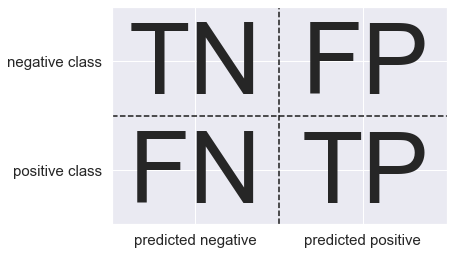

In [81]:
mglearn.plots.plot_binary_confusion_matrix()

In [82]:
from sklearn.metrics import classification_report
print(classification_report(y_test,model.predict(x_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



In [83]:
#Sensitivity = TP/TP+FN

print('Sensitivity: ', 39/(39+8))

Sensitivity:  0.8297872340425532


In [84]:
#Specificty = TN/(FP+TN)

print('Specificity: ',401/(2+401))

Specificity:  0.9950372208436724


In [85]:
from sklearn.model_selection import GridSearchCV
param_grid={
    'n_estimators':[10,200],
    'max_features':['auto','sqrt','log2',0.5],
}
gs=GridSearchCV(estimator=model, param_grid=param_grid, \
               scoring='recall',n_jobs=-1)
gs.fit(x_train,y_train)
recall_score(y_test,gs.best_estimator_.predict(x_test))

NameError: name 'recall_score' is not defined

In [ ]:
#Değerlendirme Metrikleri(Evaluation Metrics)- NAIVE BAYES

In [ ]:
#Accuracy = Number of correct predictions\Total number of predictions

from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, \
                                                 random_state=42)

model=GaussianNB().fit(x_train,y_train)
model.score(x_test,y_test)

In [ ]:
#DummyClassifier on the same dataset:

from sklearn.dummy import DummyClassifier

dummy = DummyClassifier(strategy='most_frequent',random_state=42)
dummy.fit(x_train,y_train)
dummy.score(x_test,y_test)

In [ ]:
from sklearn.datasets import make_classification

x,y = make_classification(n_samples=10000, n_classes=2, \
                         weights=[0.95,0.05], random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(random_state=42).fit(x_train,y_train)
model.score(x_test,y_test)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,model.predict(x_test))

In [ ]:
import sys
!{sys.executable} -m pip install mglearn
import mglearn

In [ ]:
mglearn.plots.plot_binary_confusion_matrix() 
#confusion_matrix değerleri bir önceki kod çıktısında mevcuttur.bu değerler bu şekildeki ifadelere karşılık gelir.Bunları diğer metrik türlerini hesaplamada kullanacağız

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,model.predict(x_test)))

In [ ]:
#Sensitivity = TP/TP+FN

print('Sensitivity: ', 52/(52+64))

In [ ]:
#Specificty = TN/(FP+TN)

print('Specificity: ',1876/(8+1876))

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid={
    'n_estimators':[10,200],
    'max_features':['auto','sqrt','log2',0.5],
}
gs=GridSearchCV(estimator=model, param_grid=param_grid, \
               scoring='recall',n_jobs=-1)
gs.fit(x_train,y_train)
recall_score(y_test,gs.best_estimator_.predict(x_test))